# Feed-forward neural network

<img src="ff_nn.jpeg">

Давайте вспомним, что такое нейронные сети прямого распространения. 

Нейронные сети прямого распространения (feed forward neural networks, FF или FFNN) и перцептроны (perceptrons, P) очень прямолинейны, они передают информацию от входа к выходу. Нейронные сети часто описываются в виде слоёного торта, где каждый слой состоит из входных, скрытых или выходных клеток. Клетки одного слоя не связаны между собой, а соседние слои обычно полностью связаны. Самая простая нейронная сеть имеет две входных клетки и одну выходную, и может использоваться в качестве модели логических вентилей. FFNN обычно обучается по методу обратного распространения ошибки, в котором сеть получает множества входных и выходных данных. Этот процесс называется обучением с учителем, и он отличается от обучения без учителя тем, что во втором случае множество выходных данных сеть составляет самостоятельно. Вышеупомянутая ошибка является разницей между вводом и выводом. Если у сети есть достаточное количество скрытых нейронов, она теоретически способна смоделировать взаимодействие между входным и выходными данными. Практически такие сети используются редко, но их часто комбинируют с другими типами для получения новых.

По сути - это последовательность матричных умножений

К выходу сети применяется функция активации

<img src="activations.png">

In [1]:
import torch
import numpy as np

from torch import nn
import torchvision

C:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(1,1)
        print(self.fc)
        self.relu = nn.ReLU()

    def forward(self, x):
        print(x)
        output = self.fc(x)
        print(output)
        output = self.relu(output)
        print(output)
        return output

In [3]:
perc = Perceptron()
print(perc)

Linear(in_features=1, out_features=1, bias=True)
Perceptron(
  (fc): Linear(in_features=1, out_features=1, bias=True)
  (relu): ReLU()
)


In [4]:
# Так выглядит инференс нейронной сети по входным данным
perc(torch.FloatTensor([5])), perc(torch.FloatTensor([-15]))

tensor([5.])
tensor([-2.7633], grad_fn=<AddBackward0>)
tensor([0.], grad_fn=<ReluBackward0>)
tensor([-15.])
tensor([4.6894], grad_fn=<AddBackward0>)
tensor([4.6894], grad_fn=<ReluBackward0>)


(tensor([0.], grad_fn=<ReluBackward0>),
 tensor([4.6894], grad_fn=<ReluBackward0>))

In [5]:
perc.fc.weight, perc.fc.bias

(Parameter containing:
 tensor([[-0.3726]], requires_grad=True),
 Parameter containing:
 tensor([-0.9001], requires_grad=True))

# Посмотрим на более сложную архитектуру

In [6]:
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [7]:
import torch.nn.functional as F

In [8]:
class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim, activation="relu"):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
        self.activation = activation
        
    def forward(self, x):
        x = self.fc(x)
        if self.activation=="relu":
            return F.relu(x)
        if self.activation=="sigmoid":
            return F.sigmoid(x)
        raise RuntimeError
        

class FeedForward(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        self.fc1 = Perceptron(input_dim, hidden_dim)
        self.fc2 = Perceptron(hidden_dim, 1, "sigmoid")
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        print(x)
        return x

In [9]:
from sklearn.datasets import make_blobs

def blob_label(y, label, loc): # assign labels
    target = np.copy(y)
    for l in loc:
        target[y == l] = label
    return target

x_train, y_train = make_blobs(n_samples=40, n_features=2, cluster_std=1.5, shuffle=True)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(blob_label(y_train, 0, [0]))
y_train = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))

x_test, y_test = make_blobs(n_samples=10, n_features=2, cluster_std=1.5, shuffle=True)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(blob_label(y_test, 0, [0]))
y_test = torch.FloatTensor(blob_label(y_test, 1, [1,2,3]))

In [10]:
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


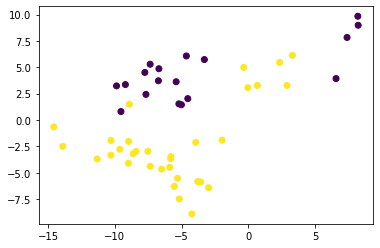

In [11]:
plt.scatter(x_train.numpy()[:, 0], x_train.numpy()[:, 1], c=y_train.numpy())
plt.scatter(x_test.numpy()[:, 0], x_test.numpy()[:, 1], c=(2+y_test.numpy()))

In [12]:
model = Feedforward(2, 5)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [13]:
model.eval()
y_pred = model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.6325131058692932


In [14]:
model.train()
epochs = 20
for epoch in range(epochs):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.8530912399291992
Epoch 1: train loss: 0.814608097076416
Epoch 2: train loss: 0.7786324620246887
Epoch 3: train loss: 0.7450243234634399
Epoch 4: train loss: 0.7136495113372803
Epoch 5: train loss: 0.6844573616981506
Epoch 6: train loss: 0.6572172045707703
Epoch 7: train loss: 0.6318081617355347
Epoch 8: train loss: 0.6081186532974243
Epoch 9: train loss: 0.5860241055488586
Epoch 10: train loss: 0.5654199123382568
Epoch 11: train loss: 0.5461703538894653
Epoch 12: train loss: 0.5281742811203003
Epoch 13: train loss: 0.5113398432731628
Epoch 14: train loss: 0.49559086561203003
Epoch 15: train loss: 0.4808253347873688
Epoch 16: train loss: 0.46697288751602173
Epoch 17: train loss: 0.45396775007247925
Epoch 18: train loss: 0.4417327344417572
Epoch 19: train loss: 0.430206835269928


In [15]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test) 
print('Test loss after Training' , after_train.item())

Test loss after Training 0.7081292867660522


In [16]:
from torch import optim

In [17]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [18]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/
torch.Size([3, 32, 32])
6


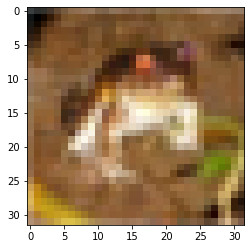

In [19]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [20]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [21]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [22]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [23]:
3 * 32 * 32

3072

In [24]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        #x = F.softmax(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [26]:
from tqdm import tqdm

In [27]:
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   301] loss: 0.344
[1,   601] loss: 0.334


 10%|█         | 1/10 [00:13<01:57, 13.01s/it]

[2,     1] loss: 0.001
[2,   301] loss: 0.308
[2,   601] loss: 0.301


 20%|██        | 2/10 [00:25<01:43, 12.95s/it]

[3,     1] loss: 0.001
[3,   301] loss: 0.289
[3,   601] loss: 0.285


 30%|███       | 3/10 [00:38<01:30, 12.94s/it]

[4,     1] loss: 0.001
[4,   301] loss: 0.280
[4,   601] loss: 0.273


 40%|████      | 4/10 [00:52<01:18, 13.05s/it]

[5,     1] loss: 0.001
[5,   301] loss: 0.269
[5,   601] loss: 0.265


 50%|█████     | 5/10 [01:05<01:05, 13.17s/it]

[6,     1] loss: 0.001
[6,   301] loss: 0.261
[6,   601] loss: 0.258


 60%|██████    | 6/10 [01:18<00:53, 13.28s/it]

[7,     1] loss: 0.001
[7,   301] loss: 0.254
[7,   601] loss: 0.251


 70%|███████   | 7/10 [01:32<00:40, 13.42s/it]

[8,     1] loss: 0.001
[8,   301] loss: 0.248
[8,   601] loss: 0.248


 80%|████████  | 8/10 [01:46<00:26, 13.47s/it]

[9,     1] loss: 0.001
[9,   301] loss: 0.243
[9,   601] loss: 0.242


 90%|█████████ | 9/10 [01:59<00:13, 13.42s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.237
[10,   601] loss: 0.239


100%|██████████| 10/10 [02:13<00:00, 13.32s/it]

Training is finished!
